In [90]:
import pandas as pd
import numpy as np

In [91]:
df = pd.read_csv("spam.csv", encoding="latin1")

In [92]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3634,ham,It's not that you make me cry. It's just that ...,NaN,NaN,NaN
4065,ham,Fyi I'm gonna call you sporadically starting a...,NaN,NaN,NaN
5513,ham,Yes. Please leave at &lt;#&gt; . So that at ...,NaN,NaN,NaN
2382,ham,I will reach before ten morning,NaN,NaN,NaN
1697,ham,Hai priya are you right. What doctor said pa. ...,NaN,NaN,NaN


In [93]:
df.shape

(5572, 5)

In [94]:
# 1. Data cleaning 
# 2. EDA
# 3. Text preprocessing
# 4. Model Building 
# 5. Evaluation
# 6. Improvement

## 1. Data Cleaning

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [96]:
# drop last 3 columns
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [97]:
df.sample(5)

,v1,v2
1886,spam,Dear 0776xxxxxxx U've been invited to XCHAT. T...
4084,spam,Orange brings you ringtones from all time Char...
5143,ham,Hi darlin im on helens fone im gonna b up the ...
5328,ham,Sweet heart how are you?
5544,ham,"I'm taking derek &amp; taylor to walmart, if I..."


In [98]:
# renaming the cols
df.rename(columns = {'v1' : 'target','v2':'text'},inplace = True)

In [99]:
df.head(5)

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [100]:
%pip install scikit-learn
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

Note: you may need to restart the kernel to use updated packages.


In [101]:
df['target'] = encoder.fit_transform(df['target'])
# 0 -> ham
# 1 -> spam

In [102]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [103]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [104]:
#check for duplicate values
df.duplicated().sum()

np.int64(403)

In [105]:
#remove duplicate values
df = df.drop_duplicates(keep="first")

In [106]:
df.duplicated().sum()

np.int64(0)

In [107]:
df.shape

(5169, 2)

## 2. EDA

In [108]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

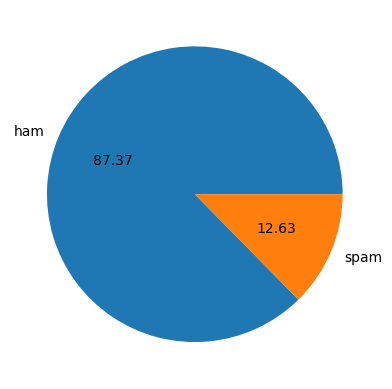

In [109]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct = "%0.2f")
plt.show()

In [110]:
# Data is imbalanced

In [111]:
%pip install nltk
import nltk #natural language toolkit
nltk.download('punkt')
nltk.download('punkt_tab')

Note: you may need to restart the kernel to use updated packages.


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Pralo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Pralo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [112]:
df['num_characters'] = df['text'].apply(len)

In [113]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [114]:
# number of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [115]:

df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [116]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [117]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [118]:
# ham messages
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [119]:
#spam
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [120]:
%pip install seaborn
import seaborn as sns

Note: you may need to restart the kernel to use updated packages.


<Axes: xlabel='num_characters', ylabel='Count'>

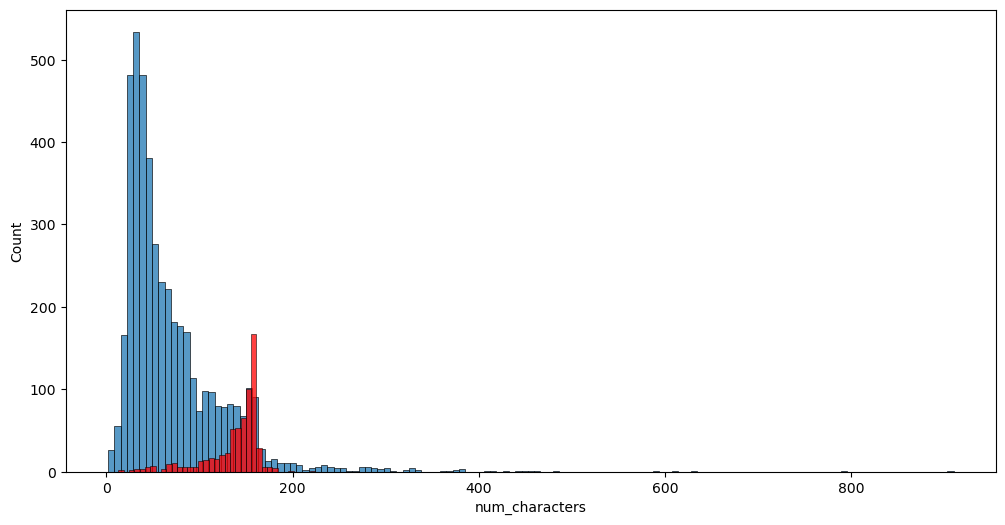

In [121]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'], color='red')

<Axes: xlabel='num_words', ylabel='Count'>

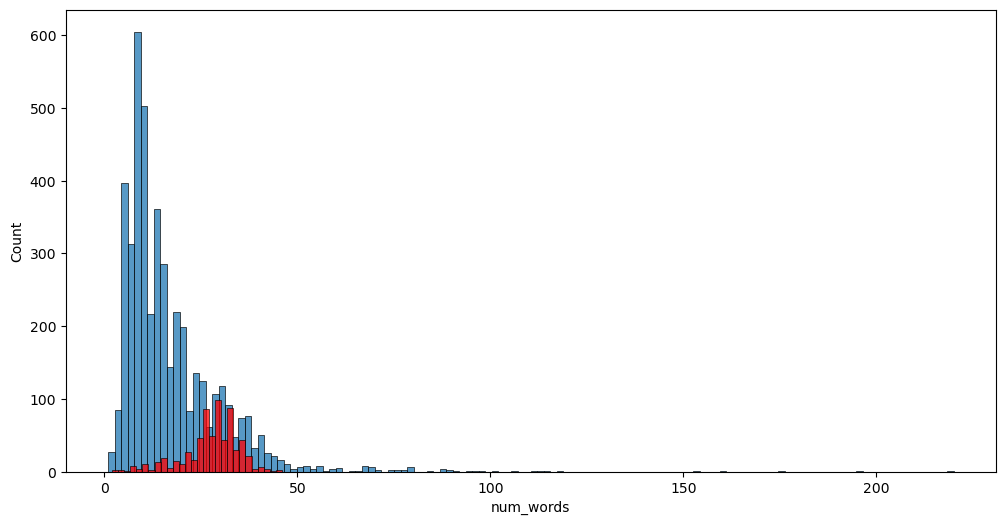

In [122]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'], color='red')               

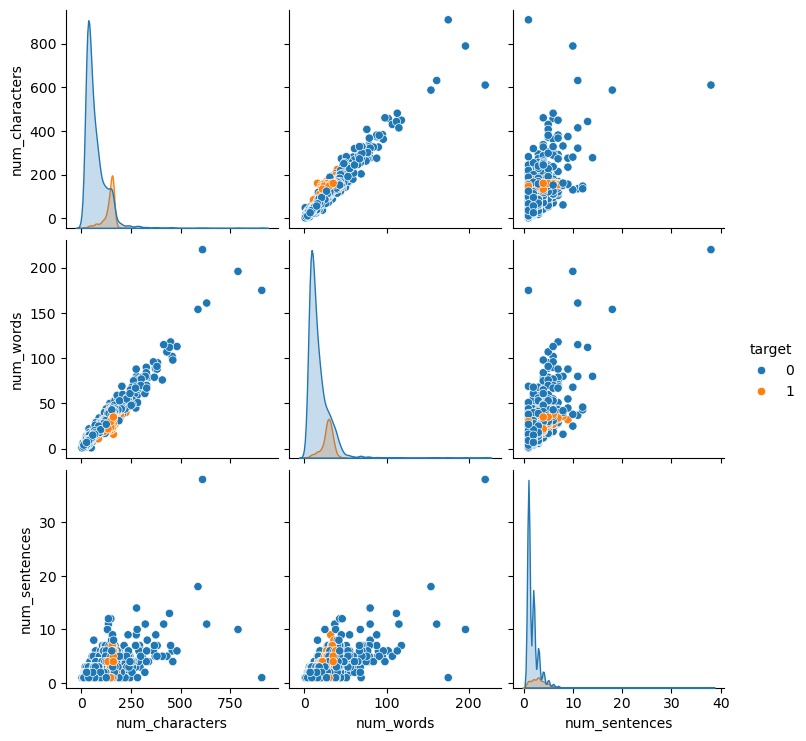

In [123]:
sns.pairplot(df,hue='target')

In [124]:
df.select_dtypes(include='number').corr()

,target,num_characters,num_words,num_sentences
target,1.000000,0.384717,0.262912,0.263939
num_characters,0.384717,1.000000,0.965760,0.624139
num_words,0.262912,0.965760,1.000000,0.679971
num_sentences,0.263939,0.624139,0.679971,1.000000


<Axes: >

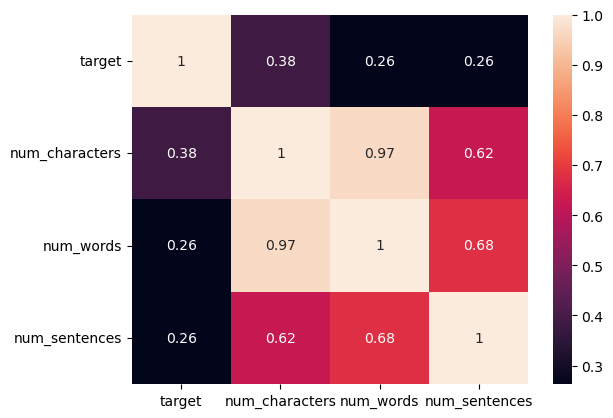

In [125]:
sns.heatmap(df.select_dtypes(include='number').corr(),annot=True)

## 3. Data preprocessing 
- Lowercase
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming

In [126]:
import string
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Pralo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [127]:
# For stemming
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [128]:

def transform_text(text):
    text = text.lower()  # lowercasing
    text = nltk.word_tokenize(text) #tokenization, returns a list

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)  # Removing special characters

    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)   # Removing stopwords
    
    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i)) #stemming 

    return " ".join(y) #joining of list and returning a string



In [129]:
transform_text('I am Pralov malla and && I love to %%coding?')

'pralov malla love code'

In [130]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [133]:
df['transformed_text'] = df['text'].apply(transform_text)

In [134]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [143]:
from wordcloud import WordCloud
wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color='white')

In [145]:
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

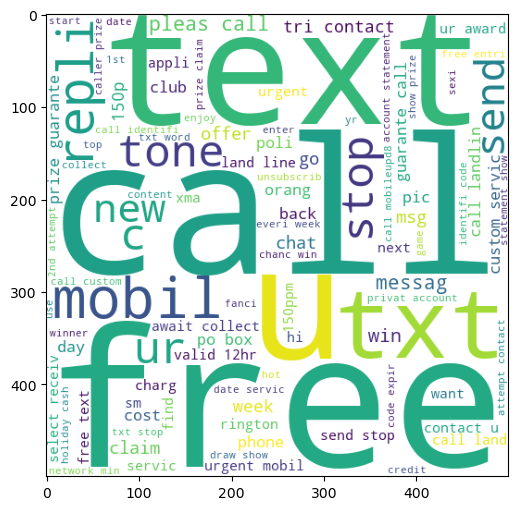

In [147]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [149]:
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

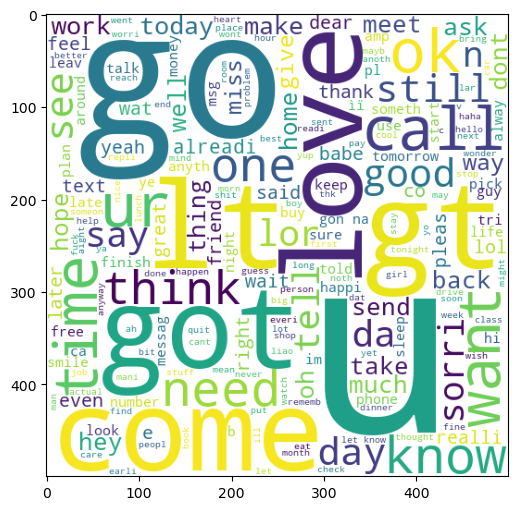

In [150]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

### Extracting Top words in spam messages

In [156]:
spam_corpus = []
for msg in df[df['target']==1]['transformed_text'].tolist():
   for word in msg.split():
      spam_corpus.append(word)

In [157]:
len(spam_corpus)

9939

In [158]:
from collections import Counter